In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('player_stats_cleaned.csv', sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Columns: 167 entries, Player_id to Sets_per_Match
dtypes: bool(2), int64(37), object(128)
memory usage: 113.7+ KB


In [4]:
new_df = df[['1st_Serve_%', '1st_Serve_Won_%', '2nd_Serve_Won_%', 'Points_per_Service_Game', 'Service_Games_Won_%']]

In [46]:
new_df = df[['1st_Srv._Return_Won_%', '2nd_Srv._Return_Won_%', 'Return_Points_Won_%', 'Rtn._In-play_Pts._Won_%', 'Points_per_Return_Game',
            'Pts._Won_per_Rtn._Game', 'Break_Points_Won_%', 'BPs_per_Return_Game', 'BPs_per_Match', 'Return_Games_Won_%',]]

In [61]:
new_df = df[['Points_Dominance', 'Games_Dominance', 'Break_Points_Ratio']]

In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
Points_Dominance      88 non-null object
Games_Dominance       88 non-null object
Break_Points_Ratio    88 non-null object
dtypes: object(3)
memory usage: 2.1+ KB


In [63]:
new_df = new_df.replace(',', '.', regex=True).astype("float")

In [64]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(new_df, 3)
kmeans = pd.DataFrame(clust_labels)
new_df.insert((new_df.shape[1]),'kmeans',kmeans)

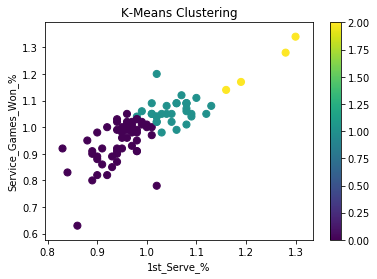

In [65]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_df['Points_Dominance'],	new_df['Break_Points_Ratio'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1st_Serve_%')
ax.set_ylabel('Service_Games_Won_%')
plt.colorbar(scatter)
